# Fraudulent Analytics
## Group - 5

### Punith
### Dalton
### Bhaskar 
### Murali Krishna
### Ananya
### Vishwanath                                                                                                                                                               

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
from collections import Counter
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/Documents related to academics/Insurance Dataset.csv"
df = pd.read_csv(path)

### EDA

In [6]:
df.isnull().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [8]:
df.mode()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Hudson Valley,Erie,413.0,70 or Older,F,White,Not Span/Hispanic,2,Emergency,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",2,1.0,Medical,0,N,Y,3052.0,1208.47,0.827984,1,2


#### It is observed that Area_Service, Hospital County, Hospital ID and Mortality risk having null values, it is replaced with mode value

In [9]:
df["Area_Service"].fillna('Hudson Valley', inplace = True)

In [10]:
df["Hospital County"].fillna('Erie', inplace = True)
df["Hospital Id"].fillna(413.0, inplace = True)

In [11]:
df["Mortality risk"].fillna(1.0,inplace=True)

In [12]:
df.isnull().sum() # Null values are replaced with Mode

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [13]:
df[df.duplicated()]

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1125,Western NY,Allegany,39.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3700,N,N,1678.75,737.21,0.439141,1,1
3086,Western NY,Cattaraugus,66.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3600,N,N,1251.50,829.70,0.662961,0,1
3226,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4209,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4234,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2800,N,N,1150.50,788.65,0.685486,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015327,New York City,Bronx,1168.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2900,N,N,5955.85,1303.62,0.218881,1,3
1025529,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3
1028997,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,0,N,N,12557.00,2963.40,0.235996,1,2
1035973,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3


In [14]:
df[df.duplicated()].shape

(4814, 24)

In [15]:
df1 = df.drop_duplicates()

In [16]:
df1.shape

(1043761, 24)

### Data Visualisation

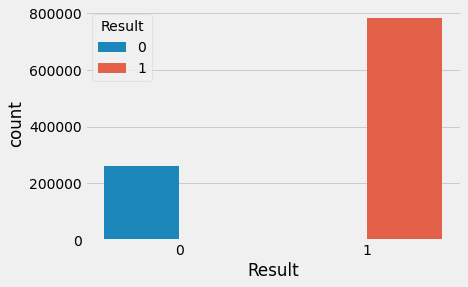

In [17]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Result', data=df1,hue='Result')

In [18]:
df1['Result'].value_counts()

1    782188
0    261573
Name: Result, dtype: int64

#### There are 2,62,168 fraud claims in the insurance company out of 10,48,575 total claims, which indicates around 25% fraudulent claims

In [19]:
df1['Area_Service'].value_counts()

Hudson Valley      262535
Western NY         179371
Central NY         170225
Capital/Adirond    170076
Finger Lakes       155507
New York City       74309
Southern Tier       31738
Name: Area_Service, dtype: int64

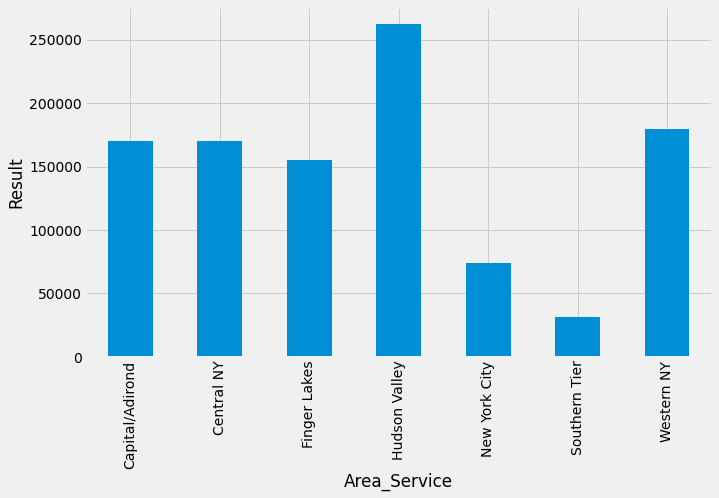

In [20]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df1.groupby('Area_Service').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

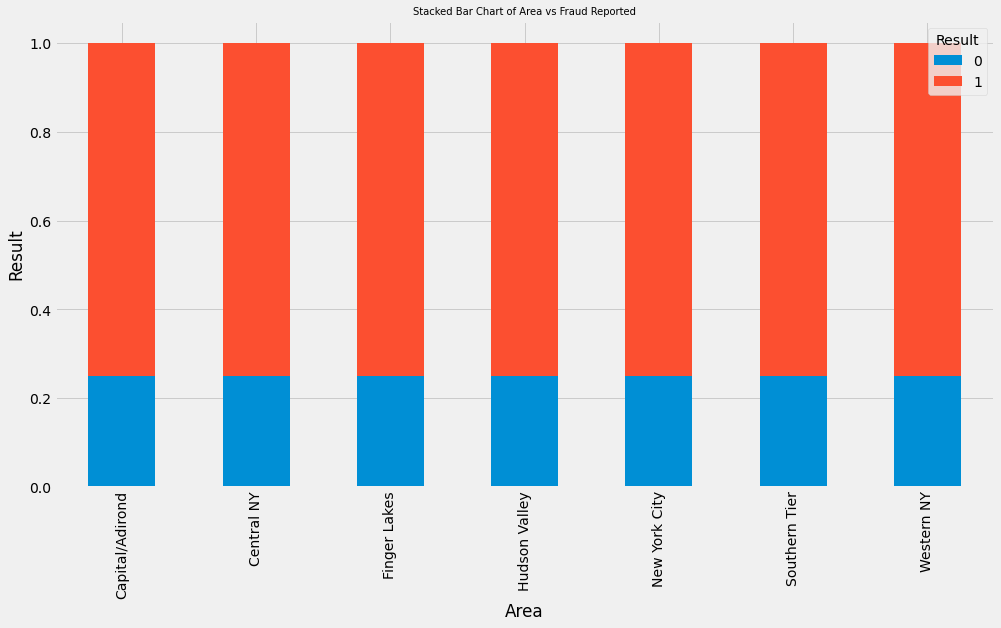

In [21]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1.Area_Service, df1.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Area vs Fraud Reported', fontsize=10)
plt.xlabel('Area')
plt.ylabel('Result')
plt.show()

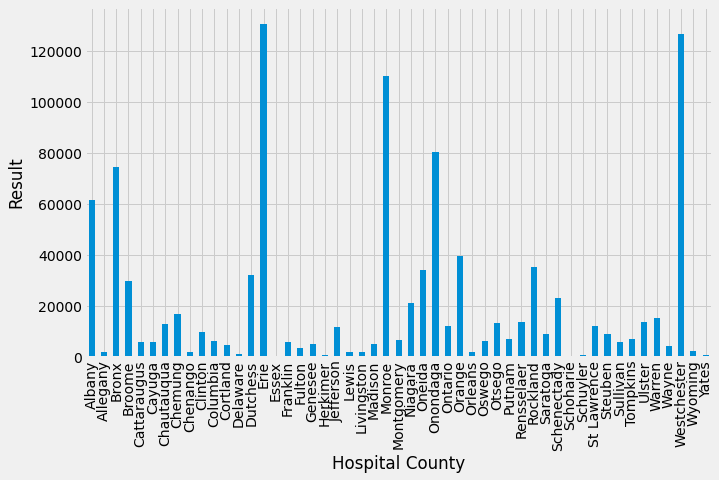

In [22]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df1.groupby('Hospital County').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [23]:
pd.crosstab(df1[("Hospital County")], df1.Result)

Result,0,1
Hospital County,,
Albany,15366,46178
Allegany,481,1589
Bronx,18635,55674
Broome,7462,22281
Cattaraugus,1452,4298
Cayuga,1404,4281
Chautauqua,3190,9567
Chemung,4234,12433
Chenango,500,1495


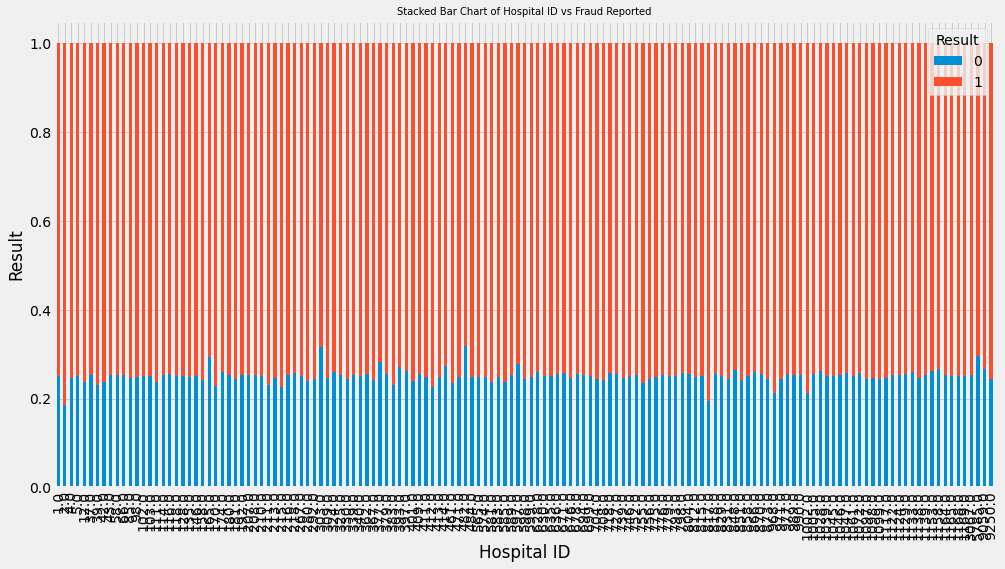

In [24]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1[("Hospital Id")], df1.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Hospital ID vs Fraud Reported', fontsize=10)
plt.xlabel('Hospital ID')
plt.ylabel('Result')
plt.show()

In [25]:
pd.crosstab(df1[("Hospital Id")], df1.Result)

Result,0,1
Hospital Id,,
1.0,8202,24596
2.0,5,22
4.0,982,3022
5.0,6177,18538
12.0,264,847
...,...,...
1169.0,8245,24686
3067.0,4507,13240
5785.0,80,191


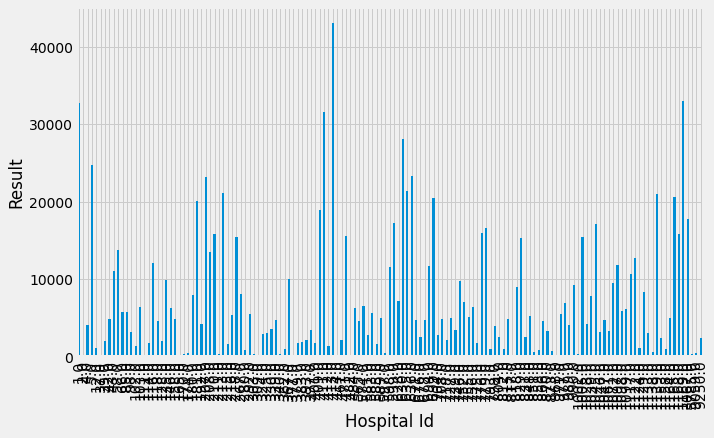

In [26]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df1.groupby('Hospital Id').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

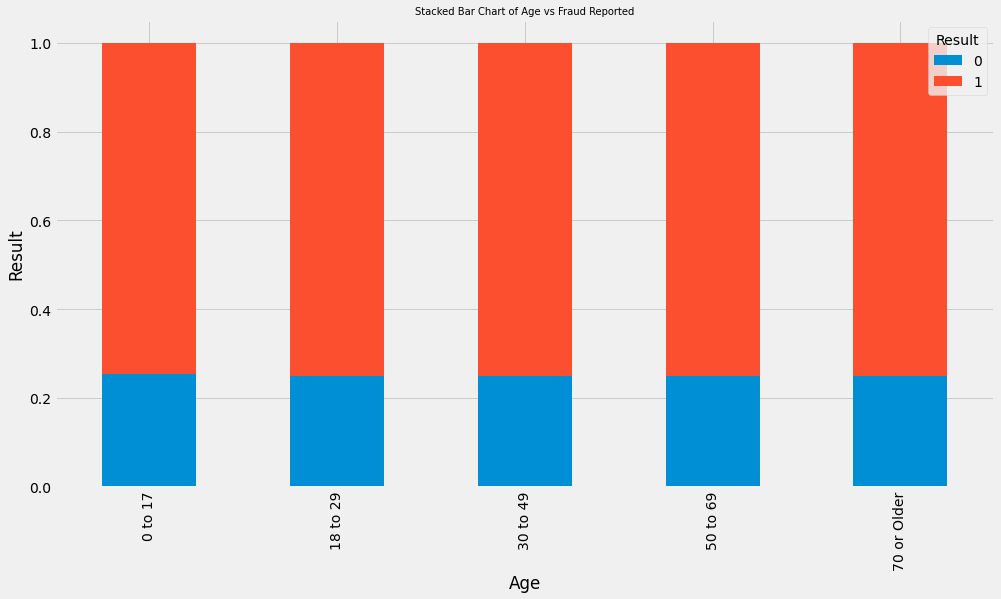

In [27]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1.Age, df1.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=10)
plt.xlabel('Age')
plt.ylabel('Result')
plt.show()

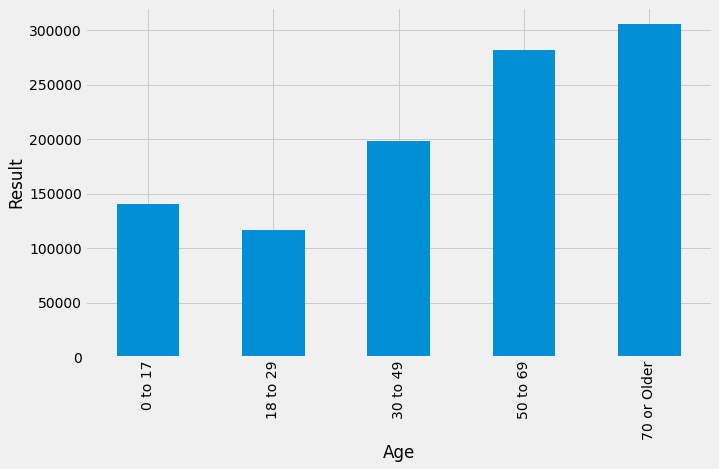

In [28]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df1.groupby('Age').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [29]:
pd.crosstab(df1.Age, df1.Result) 

Result,0,1
Age,,
0 to 17,35682,104737
18 to 29,29325,87584
30 to 49,49518,149069
50 to 69,70383,211503
70 or Older,76665,229295


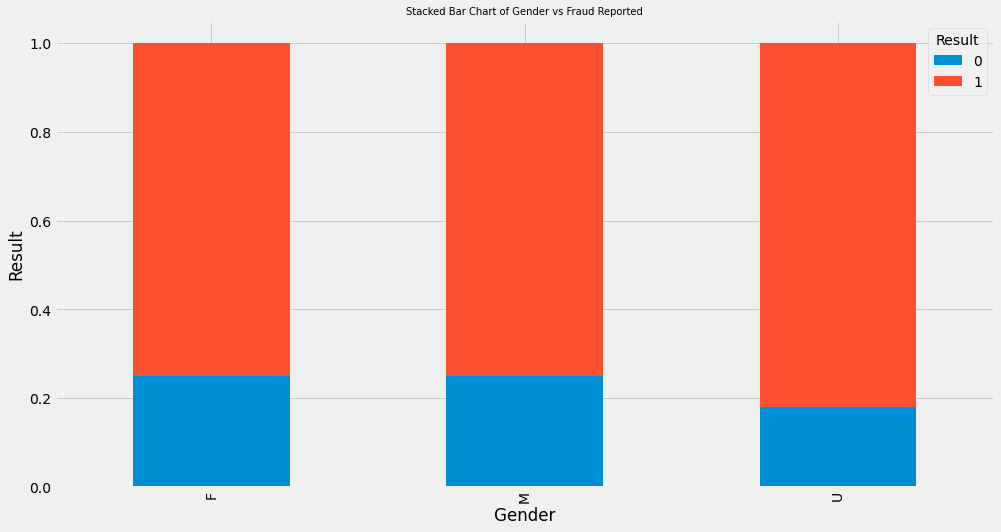

In [30]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1.Gender, df1.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Fraud Reported', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Result')
plt.show()

In [31]:
pd.crosstab(df1.Gender, df1.Result)

Result,0,1
Gender,,
F,148002,442554
M,113562,339593
U,9,41


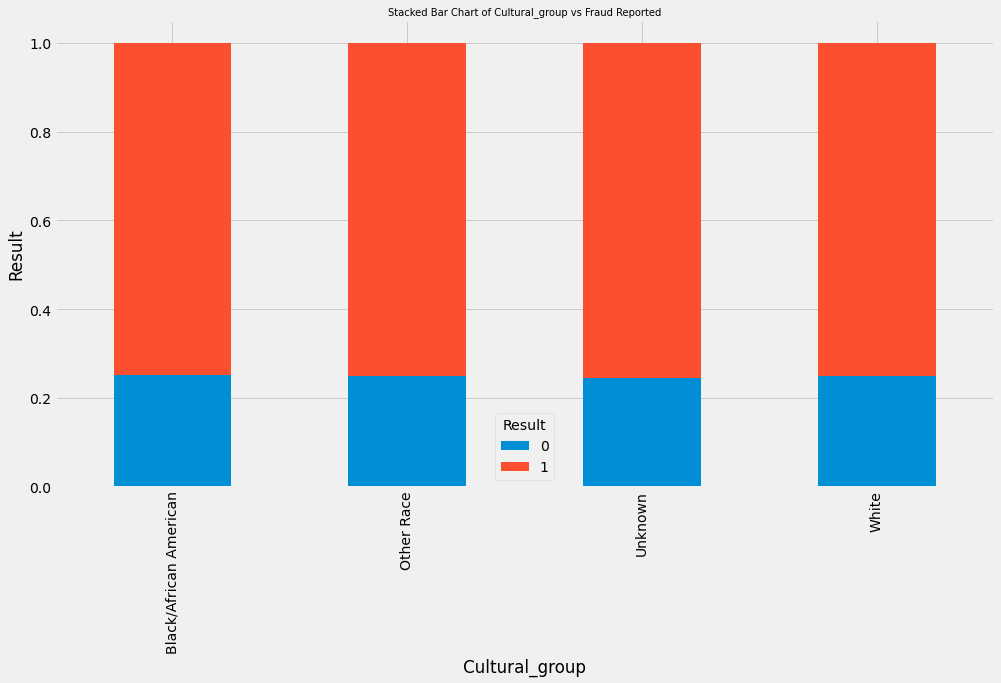

In [32]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1.Cultural_group, df1.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Cultural_group vs Fraud Reported', fontsize=10)
plt.xlabel('Cultural_group')
plt.ylabel('Result')
plt.show()

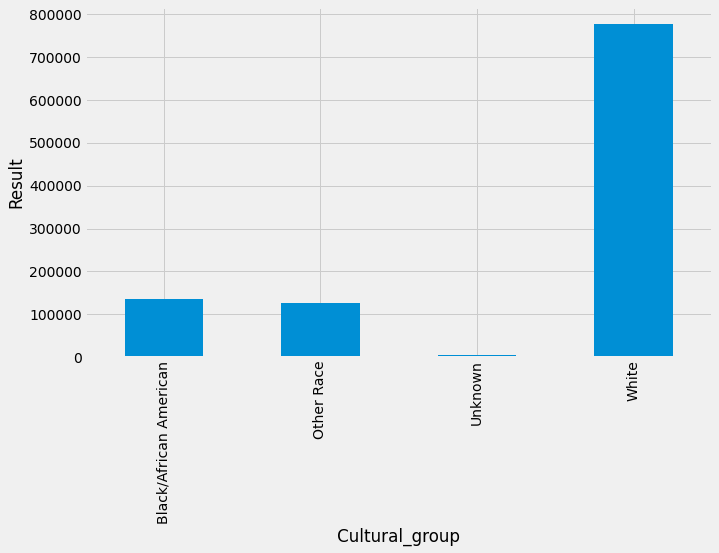

In [33]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df1.groupby('Cultural_group').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

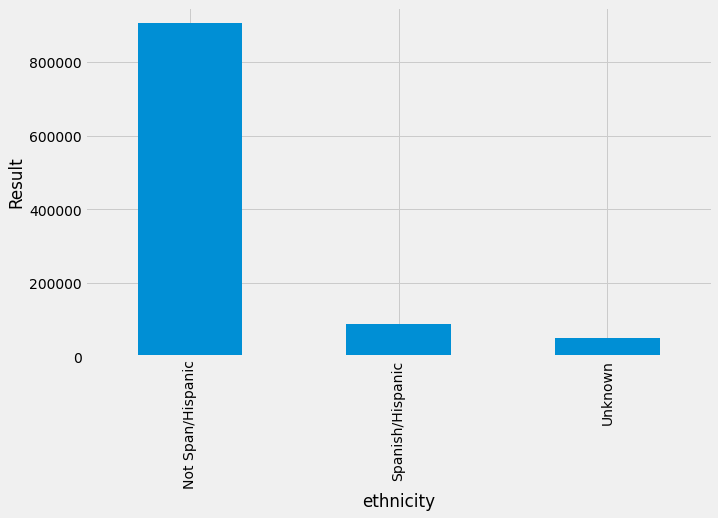

In [34]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df1.groupby('ethnicity').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

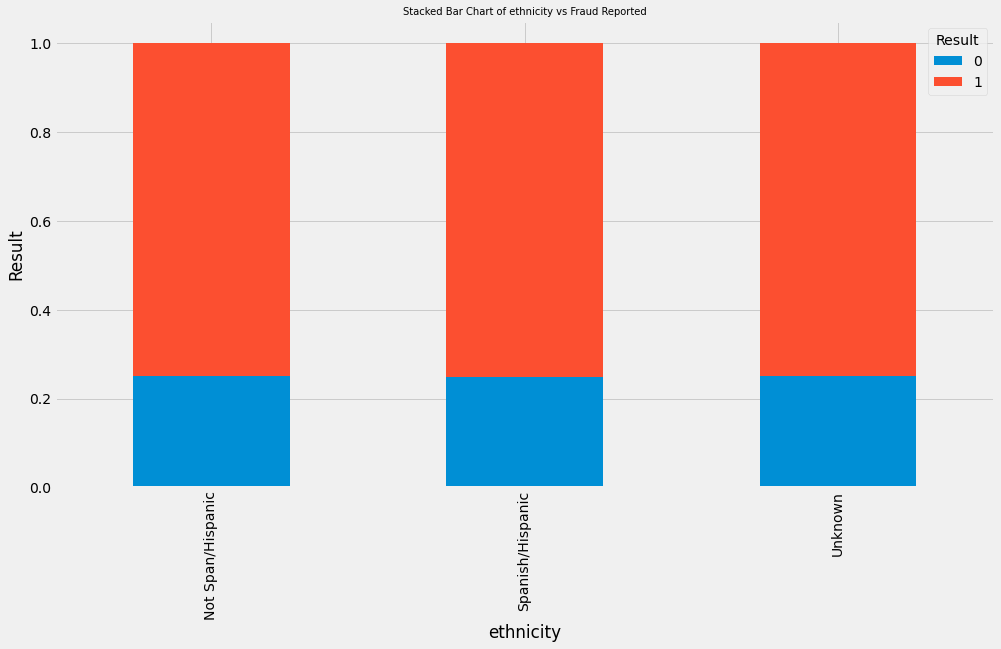

In [35]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1.ethnicity, df1.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of ethnicity vs Fraud Reported', fontsize=10)
plt.xlabel('ethnicity')
plt.ylabel('Result')
plt.show()

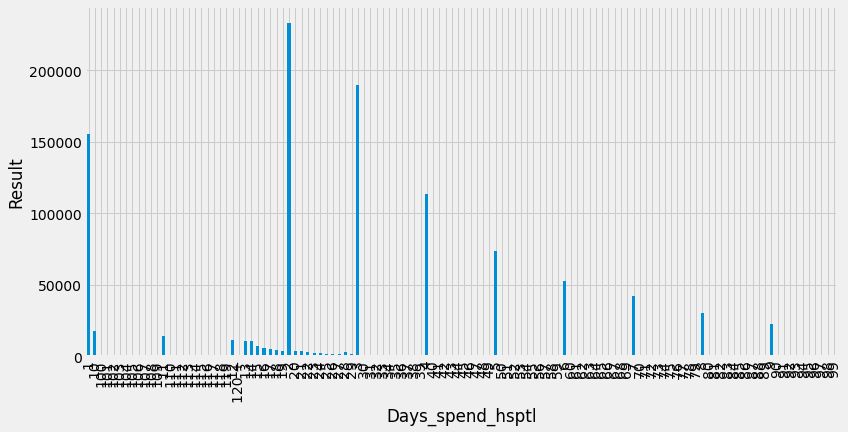

In [36]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (12,6))
ax = df1.groupby('Days_spend_hsptl').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

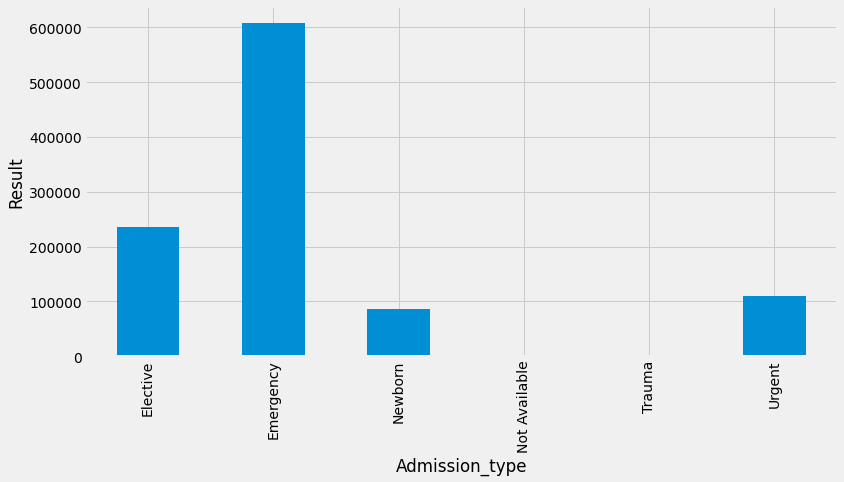

In [37]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (12,6))
ax = df1.groupby('Admission_type').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

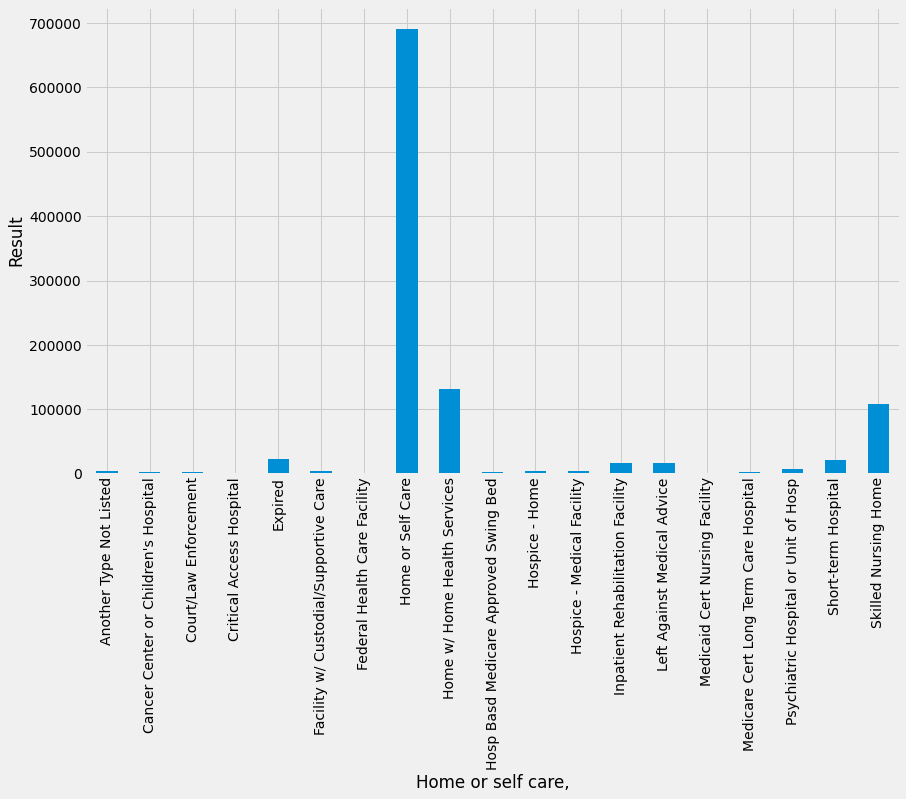

In [38]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('Home or self care,').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

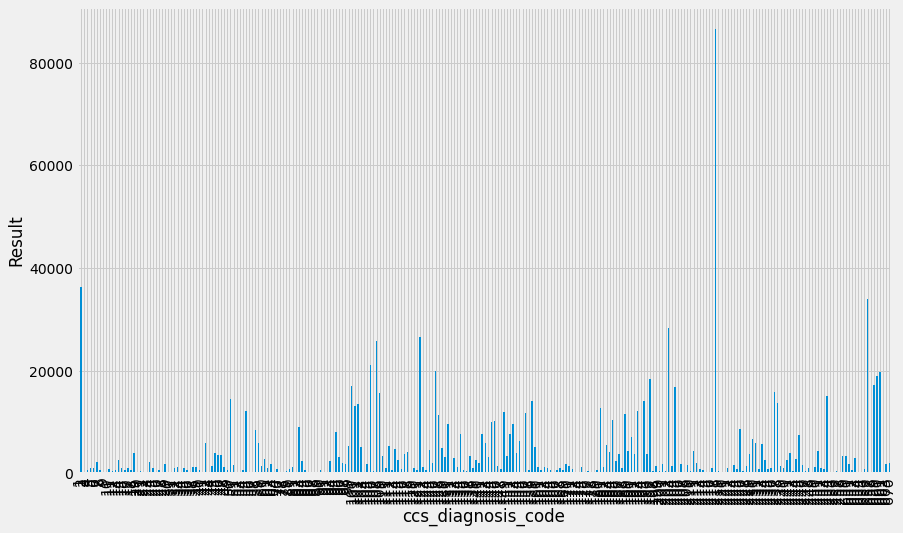

In [39]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('ccs_diagnosis_code').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

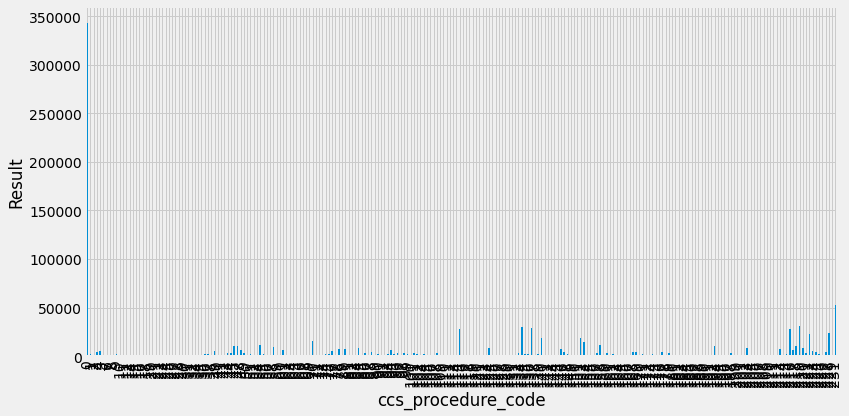

In [40]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (12,6))
ax = df1.groupby('ccs_procedure_code').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

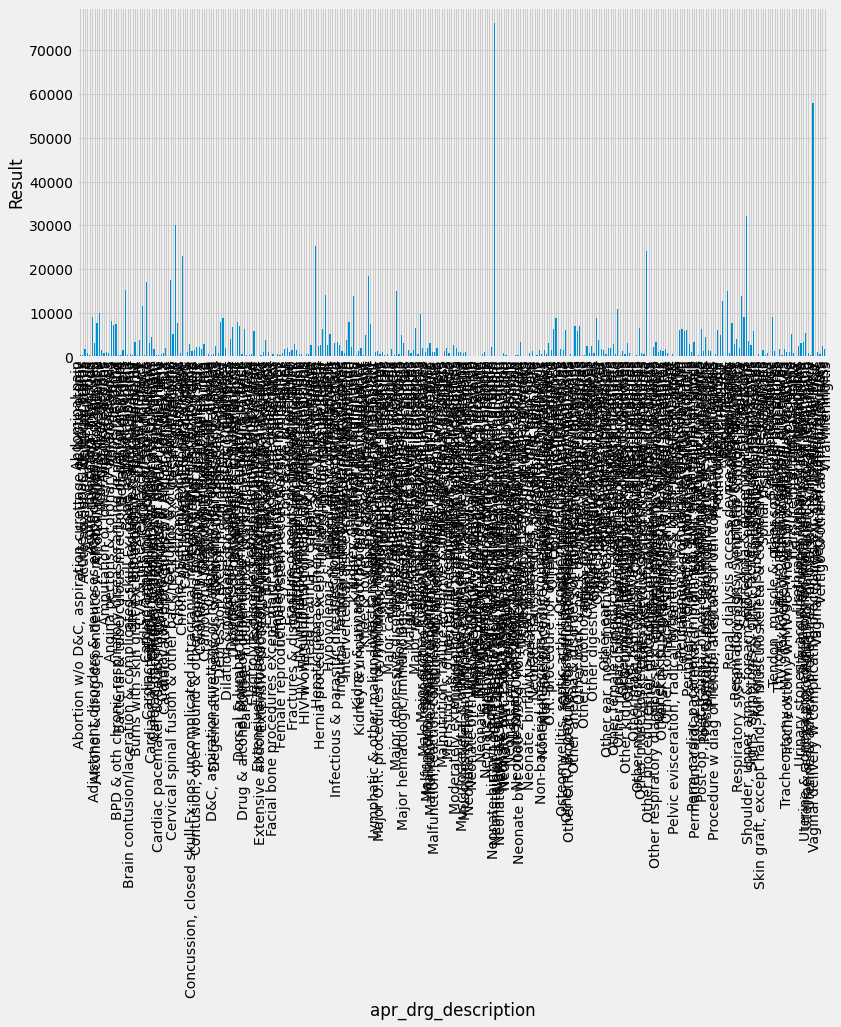

In [41]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (12,6))
ax = df1.groupby('apr_drg_description').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

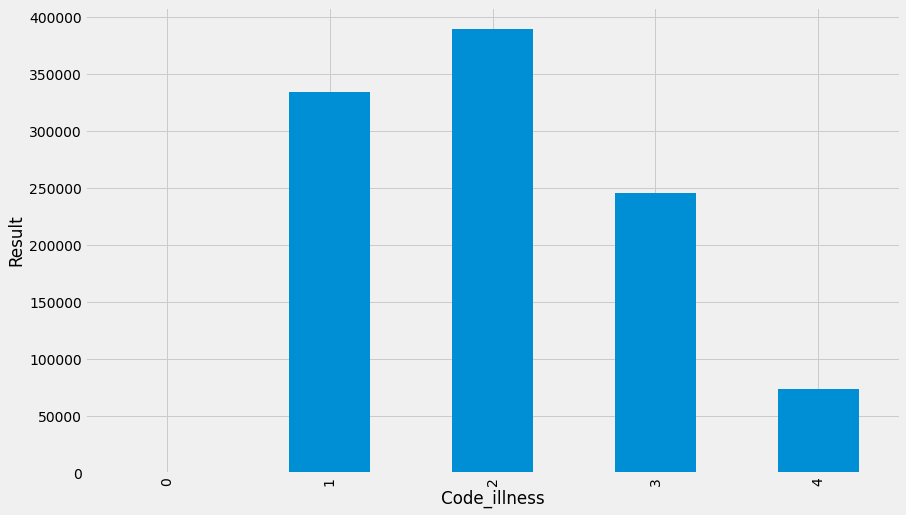

In [42]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('Code_illness').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

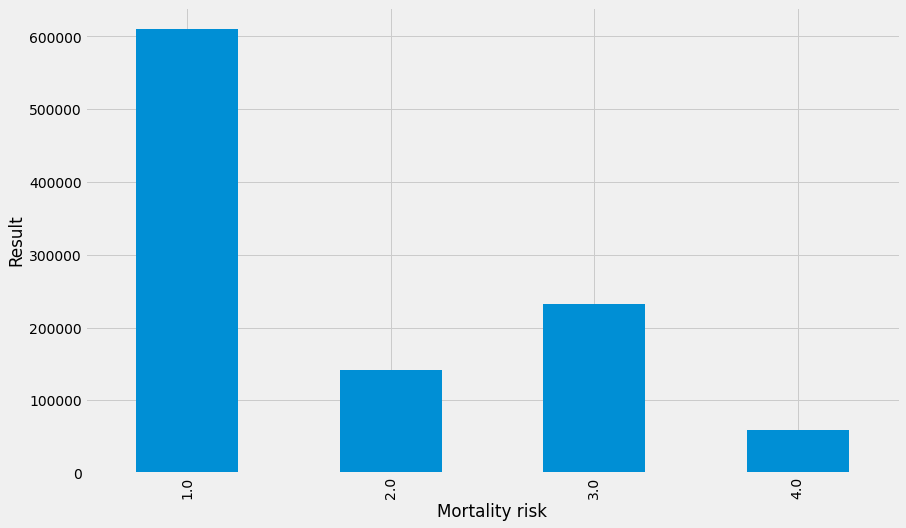

In [43]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('Mortality risk').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

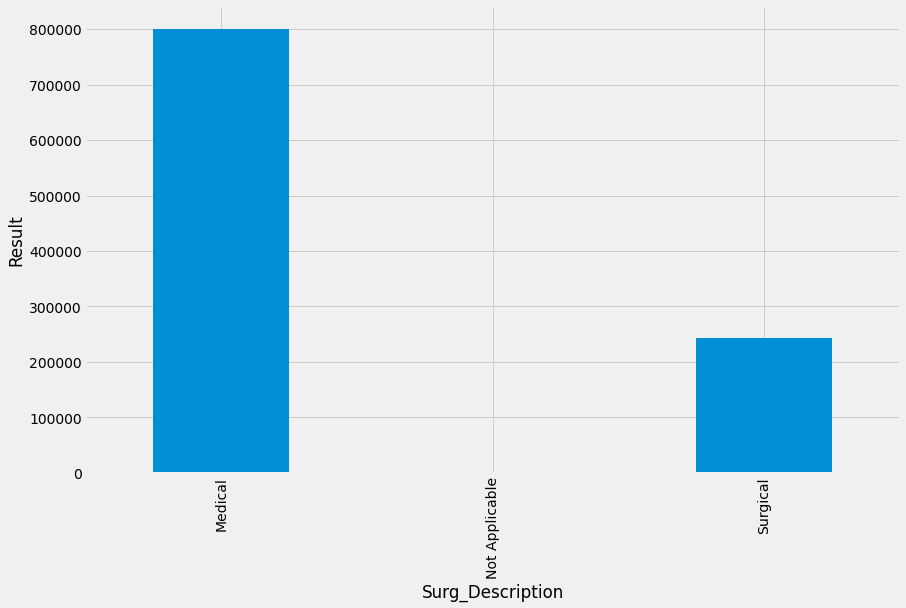

In [44]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('Surg_Description').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

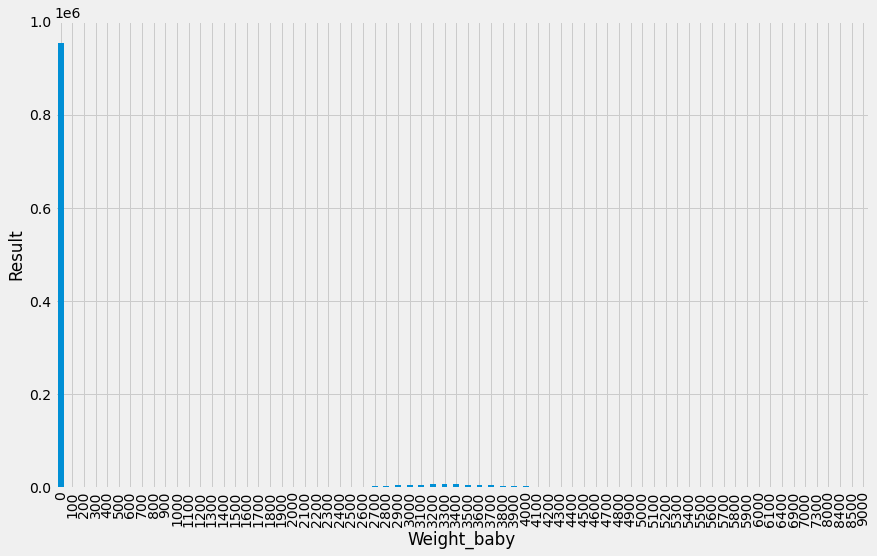

In [45]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('Weight_baby').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

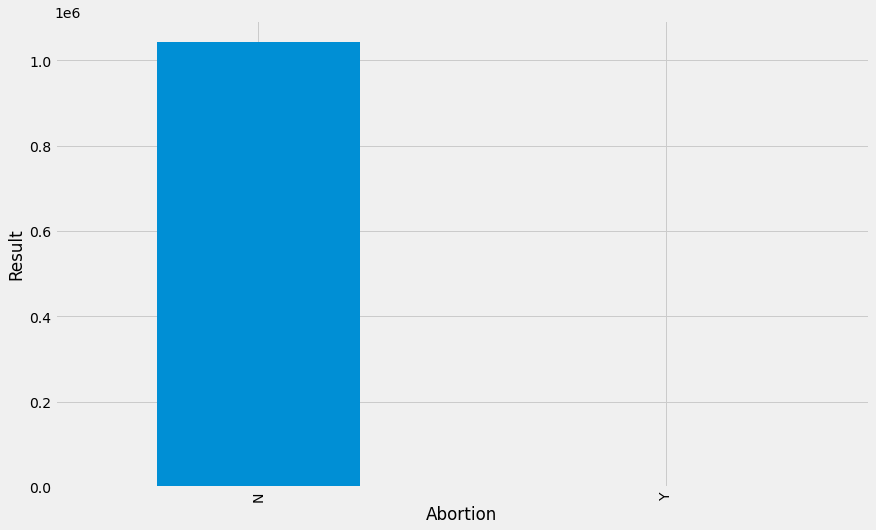

In [46]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('Abortion').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

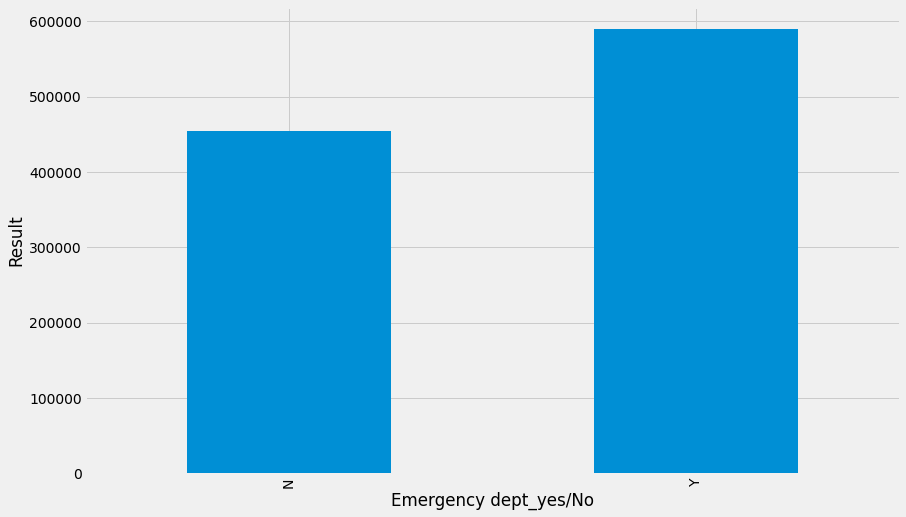

In [47]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('Emergency dept_yes/No').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

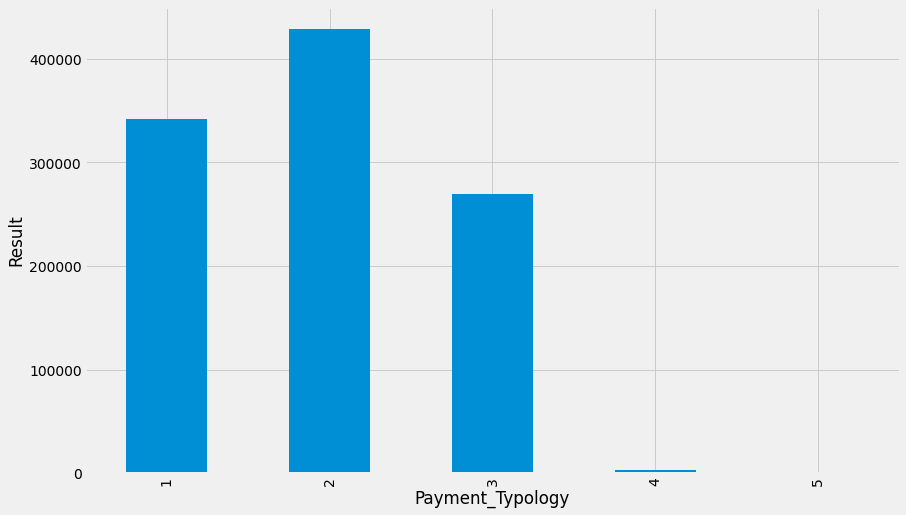

In [48]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = df1.groupby('Payment_Typology').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [49]:
pd.crosstab(df1.Payment_Typology, df1.Result)

Result,0,1
Payment_Typology,,
1,85982,255624
2,107256,321809
3,67436,202085
4,878,2625
5,21,45


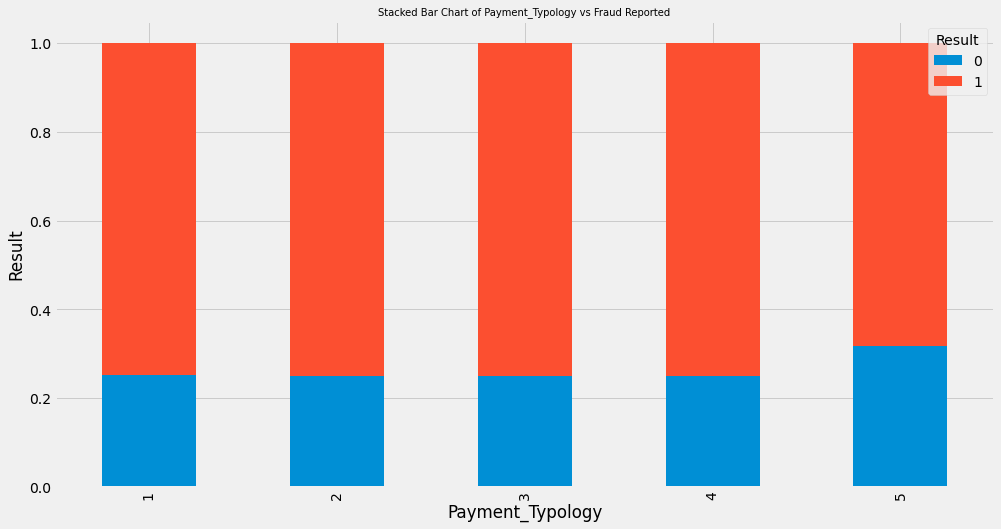

In [50]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1.Payment_Typology, df1.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Payment_Typology vs Fraud Reported', fontsize=10)
plt.xlabel('Payment_Typology')
plt.ylabel('Result')
plt.show()

### To perform encoding for the categorical variables

In [52]:
df_new = df1.copy()

In [53]:
df_new[['Abortion']] = df_new[['Abortion']].astype(str)
df_new[['Emergency dept_yes/No']] = df_new[['Emergency dept_yes/No']].astype(str)
df_new[['Home or self care']] = df_new[['Home or self care,']].astype(str)
df_new['Area_Service'] = labelencoder.fit_transform(df_new['Area_Service'])
df_new[['Age']] = df_new[['Age']].astype(str)
df_new[['Gender']] = df_new[['Gender']].astype(str)
df_new[['Cultural_group']] = df_new[['Cultural_group']].astype(str)
df_new[['ethnicity']] = df_new[['ethnicity']].astype(str)
df_new[['Admission_type']] = df_new[['Admission_type']].astype(str)
df_new[['Surg_Description']] = df_new[['Surg_Description']].astype(str)
df_new[['Weight_baby']] = df_new[['Weight_baby']].astype(str)
df_new[['Days_spend_hsptl']] = df_new[['Days_spend_hsptl']].astype(str)
df_new[['apr_drg_description']] = df_new[['apr_drg_description']].astype(str)
df_new[['Hospital County']] = df_new[['Hospital County']].astype(str)

In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043761 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1043761 non-null  int64  
 1   Hospital County                        1043761 non-null  object 
 2   Hospital Id                            1043761 non-null  float64
 3   Age                                    1043761 non-null  object 
 4   Gender                                 1043761 non-null  object 
 5   Cultural_group                         1043761 non-null  object 
 6   ethnicity                              1043761 non-null  object 
 7   Days_spend_hsptl                       1043761 non-null  object 
 8   Admission_type                         1043761 non-null  object 
 9   Home or self care,                     1043761 non-null  object 
 10  ccs_diagnosis_code                     104

In [55]:
df_new['Ages'] = labelencoder.fit_transform(df_new['Age'])
df_new['Genders'] = labelencoder.fit_transform(df_new['Gender'])
df_new['Culturegroup'] = labelencoder.fit_transform(df_new['Cultural_group'])
df_new['ethnic'] = labelencoder.fit_transform(df_new['ethnicity']) 
df_new['Admissiontype'] = labelencoder.fit_transform(df_new['Admission_type']) 
df_new['Medical_description'] = labelencoder.fit_transform(df_new['Surg_Description']) 
df_new['babyweight'] = labelencoder.fit_transform(df_new['Weight_baby']) 
df_new['Abortions'] = labelencoder.fit_transform(df_new['Abortion'])
df_new['Emergency'] = labelencoder.fit_transform(df_new['Emergency dept_yes/No'])
df_new['homecare'] = labelencoder.fit_transform(df_new['Home or self care'])
df_new['hosteldays'] = labelencoder.fit_transform(df_new['Days_spend_hsptl'])
df_new['apr_drg_description'] = labelencoder.fit_transform(df_new['apr_drg_description'])
df_new['Hospitalcounty'] = labelencoder.fit_transform(df_new['Hospital County'])

In [56]:
df_new = df_new.drop(['Age', 'Gender','Home or self care','Emergency dept_yes/No','Cultural_group','ethnicity','Admission_type','Surg_Description','Abortion','Hospital County', 'Days_spend_hsptl','Home or self care,','Weight_baby'], axis = 1)

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043761 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1043761 non-null  int64  
 1   Hospital Id                            1043761 non-null  float64
 2   ccs_diagnosis_code                     1043761 non-null  int64  
 3   ccs_procedure_code                     1043761 non-null  int64  
 4   apr_drg_description                    1043761 non-null  int64  
 5   Code_illness                           1043761 non-null  int64  
 6   Mortality risk                         1043761 non-null  float64
 7   Tot_charg                              1043761 non-null  float64
 8   Tot_cost                               1043761 non-null  float64
 9   ratio_of_total_costs_to_total_charges  1043761 non-null  float64
 10  Result                                 104

### To detect Outliers by Isolation Forest

In [58]:
df2 = df_new.copy()

In [59]:
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df2)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=10, verbose=0, warm_start=False)

In [60]:
y_pred_outliers = clf.predict(df2)

In [61]:
df2['anomaly']=clf.predict(df_new.iloc[:,0:25])

In [62]:
df2

,Area_Service,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,Ages,Genders,Culturegroup,ethnic,Admissiontype,Medical_description,babyweight,Abortions,Emergency,homecare,hosteldays,Hospitalcounty,anomaly
0,6,37.0,122,0,239,1,1.0,5511.95,5582.49,1.012798,1,1,2,0,3,0,0,0,0,0,1,7,54,1,1
1,6,37.0,197,0,39,3,2.0,4783.20,5162.82,1.079365,1,1,4,0,3,0,5,0,0,0,1,17,54,1,1
2,6,37.0,122,0,239,1,1.0,3829.15,4056.52,1.059379,1,1,2,0,3,0,5,0,0,0,1,7,43,1,1
3,6,37.0,122,0,239,1,1.0,1108.20,1644.75,1.484167,0,1,0,0,3,0,5,0,0,0,1,7,0,1,1
4,6,37.0,122,0,239,2,3.0,3418.18,3370.87,0.986161,1,1,4,0,3,0,0,0,0,0,1,7,43,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4,1169.0,106,29,29,2,3.0,69650.41,13896.82,0.199522,1,3,4,0,1,1,1,0,0,0,1,18,76,2,1
1048571,4,1169.0,8,231,229,2,1.0,13587.38,3918.35,0.288382,1,3,0,0,1,0,1,0,0,0,0,7,32,2,1
1048572,4,1169.0,151,88,101,4,4.0,104629.78,24746.64,0.236516,0,3,3,1,1,1,1,0,0,0,1,15,25,2,1
1048573,4,1169.0,143,86,111,1,1.0,27521.41,6766.04,0.245846,1,3,2,0,0,0,1,2,0,0,1,7,32,2,1


In [63]:
#outlier data points
df2[df2['anomaly']==-1]

,Area_Service,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,Ages,Genders,Culturegroup,ethnic,Admissiontype,Medical_description,babyweight,Abortions,Emergency,homecare,hosteldays,Hospitalcounty,anomaly
3225,6,66.0,203,152,122,2,3.0,36225.92,70724.33,1.952313,0,1,4,1,3,0,0,2,0,0,0,9,43,4,-1
3642,6,66.0,203,153,104,2,1.0,64274.12,153023.54,2.380796,0,1,3,1,3,0,0,2,0,0,0,18,43,4,-1
3718,6,66.0,2,75,298,4,4.0,162396.02,103136.69,0.635094,0,2,4,0,3,0,1,2,0,0,1,17,44,4,-1
4317,6,66.0,203,152,122,3,2.0,43308.86,76160.99,1.758555,0,1,3,0,3,0,0,2,0,0,0,18,76,4,-1
5285,6,66.0,19,36,242,4,4.0,88827.00,79887.38,0.899359,0,2,4,1,3,0,0,2,0,0,0,18,29,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048462,4,1169.0,40,64,21,3,3.0,570119.60,147217.90,0.258223,1,3,3,1,0,0,0,2,0,0,0,8,57,2,-1
1048475,4,1169.0,2,157,109,4,4.0,335096.28,75144.79,0.224248,0,2,3,1,3,0,1,2,0,0,1,12,42,2,-1
1048479,4,1169.0,145,75,144,3,3.0,290202.29,65808.09,0.226766,1,2,3,0,1,1,1,2,0,0,1,18,41,2,-1
1048544,4,1169.0,13,222,62,4,4.0,255595.96,61940.66,0.242338,1,3,4,0,0,0,1,0,0,0,1,4,44,2,-1


In [64]:
#dropping outliers
df2.drop(df2.index[df2['anomaly']==-1])

,Area_Service,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,Ages,Genders,Culturegroup,ethnic,Admissiontype,Medical_description,babyweight,Abortions,Emergency,homecare,hosteldays,Hospitalcounty,anomaly
0,6,37.0,122,0,239,1,1.0,5511.95,5582.49,1.012798,1,1,2,0,3,0,0,0,0,0,1,7,54,1,1
1,6,37.0,197,0,39,3,2.0,4783.20,5162.82,1.079365,1,1,4,0,3,0,5,0,0,0,1,17,54,1,1
2,6,37.0,122,0,239,1,1.0,3829.15,4056.52,1.059379,1,1,2,0,3,0,5,0,0,0,1,7,43,1,1
3,6,37.0,122,0,239,1,1.0,1108.20,1644.75,1.484167,0,1,0,0,3,0,5,0,0,0,1,7,0,1,1
4,6,37.0,122,0,239,2,3.0,3418.18,3370.87,0.986161,1,1,4,0,3,0,0,0,0,0,1,7,43,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4,1169.0,106,29,29,2,3.0,69650.41,13896.82,0.199522,1,3,4,0,1,1,1,0,0,0,1,18,76,2,1
1048571,4,1169.0,8,231,229,2,1.0,13587.38,3918.35,0.288382,1,3,0,0,1,0,1,0,0,0,0,7,32,2,1
1048572,4,1169.0,151,88,101,4,4.0,104629.78,24746.64,0.236516,0,3,3,1,1,1,1,0,0,0,1,15,25,2,1
1048573,4,1169.0,143,86,111,1,1.0,27521.41,6766.04,0.245846,1,3,2,0,0,0,1,2,0,0,1,7,32,2,1


In [65]:
df2 = df2.drop(["anomaly"], axis = 1)
df2

,Area_Service,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,Ages,Genders,Culturegroup,ethnic,Admissiontype,Medical_description,babyweight,Abortions,Emergency,homecare,hosteldays,Hospitalcounty
0,6,37.0,122,0,239,1,1.0,5511.95,5582.49,1.012798,1,1,2,0,3,0,0,0,0,0,1,7,54,1
1,6,37.0,197,0,39,3,2.0,4783.20,5162.82,1.079365,1,1,4,0,3,0,5,0,0,0,1,17,54,1
2,6,37.0,122,0,239,1,1.0,3829.15,4056.52,1.059379,1,1,2,0,3,0,5,0,0,0,1,7,43,1
3,6,37.0,122,0,239,1,1.0,1108.20,1644.75,1.484167,0,1,0,0,3,0,5,0,0,0,1,7,0,1
4,6,37.0,122,0,239,2,3.0,3418.18,3370.87,0.986161,1,1,4,0,3,0,0,0,0,0,1,7,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4,1169.0,106,29,29,2,3.0,69650.41,13896.82,0.199522,1,3,4,0,1,1,1,0,0,0,1,18,76,2
1048571,4,1169.0,8,231,229,2,1.0,13587.38,3918.35,0.288382,1,3,0,0,1,0,1,0,0,0,0,7,32,2
1048572,4,1169.0,151,88,101,4,4.0,104629.78,24746.64,0.236516,0,3,3,1,1,1,1,0,0,0,1,15,25,2
1048573,4,1169.0,143,86,111,1,1.0,27521.41,6766.04,0.245846,1,3,2,0,0,0,1,2,0,0,1,7,32,2


### Dropping Columns which are less significant

In [67]:
df2 = df2.drop(['Hospitalcounty', 'Hospital Id','babyweight','apr_drg_description','Abortions','Medical_description'],inplace=False,axis=1)

In [71]:
df2 = df2.drop(['ccs_diagnosis_code','ccs_procedure_code','ethnic'], axis =1)

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043761 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1043761 non-null  int64  
 1   Code_illness                           1043761 non-null  int64  
 2   Mortality risk                         1043761 non-null  float64
 3   Tot_charg                              1043761 non-null  float64
 4   Tot_cost                               1043761 non-null  float64
 5   ratio_of_total_costs_to_total_charges  1043761 non-null  float64
 6   Result                                 1043761 non-null  int64  
 7   Payment_Typology                       1043761 non-null  int64  
 8   Ages                                   1043761 non-null  int64  
 9   Genders                                1043761 non-null  int64  
 10  Culturegroup                           104

# Sampling of Data

In [80]:
sampledata = df2.sample(frac=0.02,random_state=42)
sampledata.Result.value_counts()

1    15550
0     5325
Name: Result, dtype: int64

In [81]:
sampledata.to_csv('Sampledata.csv')

In [82]:
sampledata = pd.read_csv('Sampledata.csv')
sampledata

,Unnamed: 0,Area_Service,Code_illness,Mortality risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,Ages,Genders,Culturegroup,Admissiontype,Emergency,homecare,hosteldays
0,483989,1,1,1.0,11130.65,3953.81,0.355218,1,1,0,1,1,1,1,8,32
1,4422,6,3,3.0,13920.95,4351.39,0.312578,1,2,4,0,3,1,1,4,87
2,992342,4,2,1.0,5768.40,4776.14,0.827984,0,3,3,1,0,1,0,12,32
3,638787,0,2,1.0,4290.87,2155.25,0.502287,1,1,4,0,3,0,0,8,32
4,214217,2,1,1.0,6619.29,2448.14,0.369850,1,1,2,0,3,1,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20870,706605,0,2,1.0,47939.97,20809.09,0.434066,1,1,3,0,3,0,0,7,54
20871,395244,1,1,1.0,3469.17,3438.25,0.991089,1,1,4,1,3,1,1,7,32
20872,198451,2,1,1.0,4334.79,2368.63,0.546423,1,1,1,0,3,0,0,7,32
20873,236779,2,2,3.0,81523.64,27153.77,0.333078,0,1,3,0,3,0,0,8,98


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


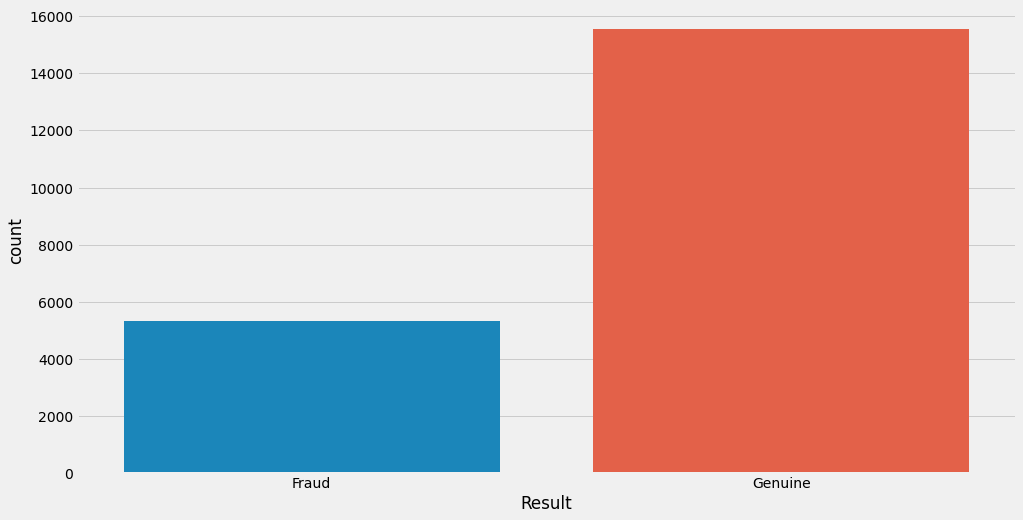

In [83]:
g = sns.countplot(sampledata['Result'])
g.set_xticklabels(['Fraud','Genuine'])
plt.show()

In [84]:
x = sampledata.drop(['Result'],axis=1)
y = sampledata.Result

In [85]:
y.value_counts()

1    15550
0     5325
Name: Result, dtype: int64

In [86]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(ratio="auto",random_state=42)
x_smote, y_smote = smote.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size=0.25,stratify=y_smote)

#Model Building

### Decision Tree Classifer

In [113]:
dtc = DecisionTreeClassifier()
paramaters= {'max_depth': [10,11,12,13,14], 
             'splitter': ['best', 'random'],
          'max_features': [10, 11,12,13,14],
          'criterion': ['gini','entropy']}
cv = StratifiedKFold(n_splits=3,random_state=42)     

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [114]:
grid = GridSearchCV(dtc,paramaters,cv=cv,n_jobs=-1,scoring='accuracy',error_score=0)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=0,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
           

In [115]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.775304 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'splitter': 'best'}


In [119]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features=11, splitter = 'best')
model1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [120]:
y_predict1 = model1.predict(x_train)
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     10399
           1       0.72      0.99      0.84     10398

    accuracy                           0.81     20797
   macro avg       0.85      0.81      0.80     20797
weighted avg       0.85      0.81      0.80     20797



In [121]:
y_predict_test1 = model_final.predict(x_test)
print(classification_report(y_test,y_predict_test1))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73      3466
           1       0.70      0.97      0.82      3467

    accuracy                           0.78      6933
   macro avg       0.83      0.78      0.77      6933
weighted avg       0.83      0.78      0.77      6933



## AdaBoost Classifier

In [126]:
adc = AdaBoostClassifier()
paramaters2 = {'n_estimators': [10,20,50,100,200,500,800]}
cv = StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [127]:
grid = GridSearchCV(adc,paramaters2,scoring='accuracy',n_jobs=-1,cv=cv,error_score=0)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=0,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 50, 100, 200, 500, 800]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [128]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.822859 using {'n_estimators': 500}


In [129]:
model2 = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features=11),n_estimators=500)
model2.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=10,
                                                         max_features=11,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                        

In [134]:
y_predict_train2 = model2.predict(x_train)
print(classification_report(y_train,y_predict_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10399
           1       1.00      1.00      1.00     10398

    accuracy                           1.00     20797
   macro avg       1.00      1.00      1.00     20797
weighted avg       1.00      1.00      1.00     20797



In [135]:
y_predict_test2 = model2.predict(x_test)
print(classification_report(y_test,y_predict_test2))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      3466
           1       0.77      0.89      0.83      3467

    accuracy                           0.82      6933
   macro avg       0.82      0.82      0.81      6933
weighted avg       0.82      0.82      0.81      6933



## Random Forest Classifier

In [146]:
rfc = RandomForestClassifier()
n_estimators = [15,30,50]
max_features = [3,6,8,10,13]
min_samples_split = [1,2,3,5]
min_samples_leaf = [1,3,4,6]
max_depth = [10,11,12,13,14]

In [147]:
paramaters3 = dict(n_estimators=n_estimators,max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
cv = StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [148]:
grid = GridSearchCV(estimator=rfc ,param_grid=paramaters3,scoring='accuracy',n_jobs=-1,cv=cv,error_score=0)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=0,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
    

In [159]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.825792 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}


In [150]:
model3 = RandomForestClassifier(n_estimators=50,max_features=6,min_samples_leaf=1,min_samples_split=3,max_depth = 14, n_jobs=-1)
model3.fit(x_train,y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [153]:
y_predict_train3 = model3.predict(x_train)
print(classification_report(y_train,y_predict_train3))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     10399
           1       0.81      1.00      0.89     10398

    accuracy                           0.88     20797
   macro avg       0.90      0.88      0.88     20797
weighted avg       0.90      0.88      0.88     20797



In [154]:
y_predict_test3 = model3.predict(x_test)
print(classification_report(y_test,y_predict_test3))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      3466
           1       0.74      0.99      0.85      3467

    accuracy                           0.82      6933
   macro avg       0.87      0.82      0.82      6933
weighted avg       0.87      0.82      0.82      6933



## XG Boost Classifier

In [155]:
xgbc = XGBClassifier()
n_estimators = [100,500,1000]
learning_rate = [0.1,0.2]
subsample = [0.9,1.0,1.1]
max_depth = [7,9,11,13]

In [156]:
paramaters4 = dict(n_estimators=n_estimators,learning_rate=learning_rate,subsample=subsample,max_depth=max_depth)
cv = StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [157]:
grid = GridSearchCV(xgbc,paramaters4,scoring='accuracy',n_jobs=-1,cv=cv,error_score=0)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=0,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': [7, 9, 11, 13],
  

In [158]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.825792 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}


In [160]:
model4 = XGBClassifier(n_estimators=100,learning_rate=0.1,subsample=0.8,max_depth=7)
model4.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [166]:
y_predict_train4 = model4.predict(x_train)
print(classification_report(y_train, y_predict_train4))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     10399
           1       0.77      1.00      0.87     10398

    accuracy                           0.85     20797
   macro avg       0.88      0.85      0.84     20797
weighted avg       0.88      0.85      0.84     20797



In [194]:
y_predict_test4 = model4.predict(x_test)
print(classification_report(y_test,y_predict_test4))

              precision    recall  f1-score   support

           0       0.99      0.66      0.80      3466
           1       0.75      0.99      0.85      3467

    accuracy                           0.83      6933
   macro avg       0.87      0.83      0.82      6933
weighted avg       0.87      0.83      0.82      6933



### KNN

In [196]:
knn = KNeighborsClassifier()
n_neighbors = range(1,25,2)
metric = ['euclidean','manhattan','minkowski']
weights = ['uniform','distance']

In [197]:
paramaters5 = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [198]:
grid = GridSearchCV(estimator=knn,param_grid=paramaters5,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)
result = grid.fit(x_train,y_train)

In [199]:
print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: 0.734914 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [200]:
model5 = KNeighborsClassifier(n_neighbors=1,metric='euclidean',weights='uniform')
model5.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [201]:
y_predict_train5 = model5.predict(x_train)
print(classification_report(y_train,y_predict_train5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10399
           1       1.00      1.00      1.00     10398

    accuracy                           1.00     20797
   macro avg       1.00      1.00      1.00     20797
weighted avg       1.00      1.00      1.00     20797



In [202]:
y_predict_test5 = model5.predict(x_test)
print(classification_report(y_test,y_predict_test5))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      3466
           1       0.86      0.72      0.78      3467

    accuracy                           0.80      6933
   macro avg       0.81      0.80      0.80      6933
weighted avg       0.81      0.80      0.80      6933



# Model Building with complete Data with highest accuracy gained

## Splitting Data

In [177]:
df2['Result'].value_counts()

1    782188
0    261573
Name: Result, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


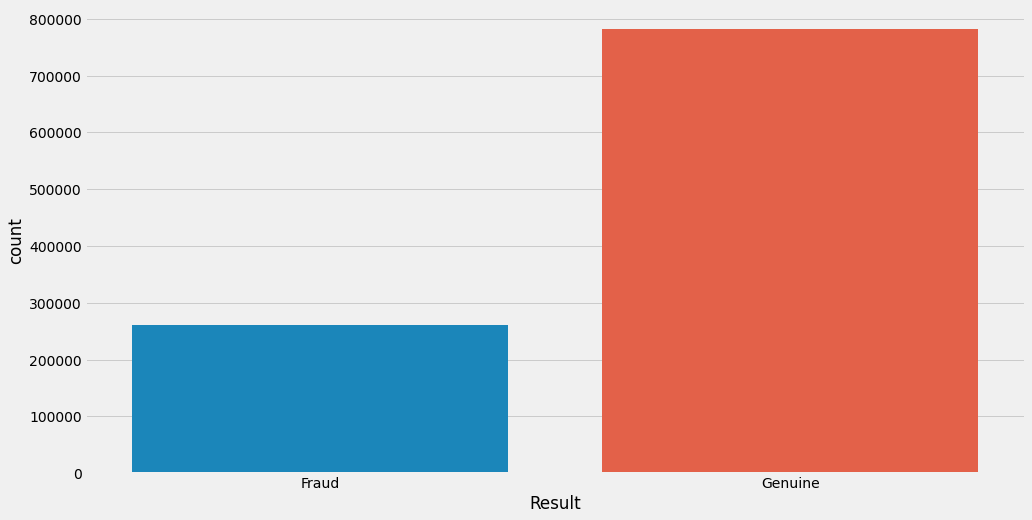

In [178]:
g = sns.countplot(df2['Result'])
g.set_xticklabels(['Fraud','Genuine'])
plt.show()

In [167]:
X = df2.drop(['Result'],axis=1)
Y = df2.Result

In [172]:
df2

,Area_Service,Code_illness,Mortality risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,Ages,Genders,Culturegroup,Admissiontype,Emergency,homecare,hosteldays
0,6,1,1.0,5511.95,5582.49,1.012798,1,1,2,0,3,0,1,7,54
1,6,3,2.0,4783.20,5162.82,1.079365,1,1,4,0,3,5,1,17,54
2,6,1,1.0,3829.15,4056.52,1.059379,1,1,2,0,3,5,1,7,43
3,6,1,1.0,1108.20,1644.75,1.484167,0,1,0,0,3,5,1,7,0
4,6,2,3.0,3418.18,3370.87,0.986161,1,1,4,0,3,0,1,7,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4,2,3.0,69650.41,13896.82,0.199522,1,3,4,0,1,1,1,18,76
1048571,4,2,1.0,13587.38,3918.35,0.288382,1,3,0,0,1,1,0,7,32
1048572,4,4,4.0,104629.78,24746.64,0.236516,0,3,3,1,1,1,1,15,25
1048573,4,1,1.0,27521.41,6766.04,0.245846,1,3,2,0,0,1,1,7,32


In [168]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(ratio="auto",random_state=42)
X_smote, Y_smote = smote.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [169]:
unique, count = np.unique(Y_smote, return_counts=True)
count

array([712981, 712981])

In [170]:
X_train,X_test,Y_train,Y_test = train_test_split(X_smote,Y_smote,test_size=0.2,stratify=Y_smote)

In [171]:
unique, count = np.unique(Y_train,return_counts=True)
count

array([570385, 570384])

## Decision Tree

In [173]:
model_final1 = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features=11, splitter = 'best')
model_final1.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [175]:
Y_predict_train1 = model_final1.predict(X_train)
print(classification_report(Y_train, Y_predict_train1))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75    570385
           1       0.72      1.00      0.83    570384

    accuracy                           0.80   1140769
   macro avg       0.86      0.80      0.79   1140769
weighted avg       0.86      0.80      0.79   1140769



In [176]:
Y_predict_test1 = model_final1.predict(X_test)
print(classification_report(Y_test,Y_predict_test1))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75    142596
           1       0.71      1.00      0.83    142597

    accuracy                           0.80    285193
   macro avg       0.86      0.80      0.79    285193
weighted avg       0.86      0.80      0.79    285193



## XG Boost Classifier

In [181]:
model_final2 = XGBClassifier(n_estimators=100,learning_rate=0.1,subsample=0.8,max_depth=7)
model_final2.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [183]:
Y_predict_train2 = model_final2.predict(X_train)
print(classification_report(Y_train, Y_predict_train2))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80    570385
           1       0.75      1.00      0.85    570384

    accuracy                           0.83   1140769
   macro avg       0.87      0.83      0.83   1140769
weighted avg       0.87      0.83      0.83   1140769



In [184]:
Y_predict_test2 = model_final2.predict(X_test)
print(classification_report(Y_test,Y_predict_test2))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79    142596
           1       0.75      1.00      0.85    142597

    accuracy                           0.83    285193
   macro avg       0.87      0.83      0.82    285193
weighted avg       0.87      0.83      0.82    285193



In [190]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_test2)

In [192]:
auc = roc_auc_score(Y_test, Y_predict_test2)
print('AUC: %.3f' % auc)

AUC: 0.830


Text(0, 0.5, 'True Positive Rate')

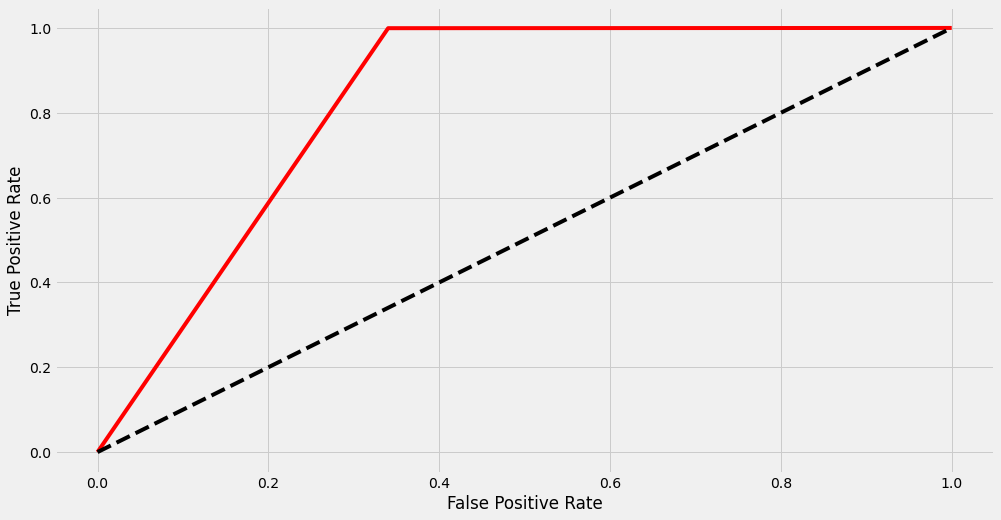

In [193]:
# Plotting of AUC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

XG Boost classifer has the highest training and test accuracy of 83% which is hence the most preferred model